In [2]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
name = ['건설환경공학과','건축학부',
        '교통물류공학과','국방정보공학과',
        '기계공학과','로봇공학과',
        '산업경영공학과','생명나노공학과',
        '스마트융합공학과','재료화학공학과']

In [156]:
i = int(input())

9


In [168]:
Uni_name = name[i]
path_name = '/content/drive/MyDrive/공대 데이터/' + Uni_name + '.xlsx'
df = pd.read_excel(path_name)
df = df.fillna(0)

if i > 7:
  df.columns = ['날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '영수증']
print(df)

            날짜                 내용       수입     지출       잔액    사업  \
0   2022-01-11           계좌 신규 개설        0      0        0     0   
1   2022-01-11    전년도 학생회비 이월(회장)  3900226      0  3900226  학생회비   
2   2022-02-23     카카오뱅크 계좌 개설 확인        1      0  3900227  학생회비   
3   2022-02-23  신입생 오티 상품 기프티콘 구매        0  18000  3882227  과내행사   
4   2022-02-23  신입생 오티 상품 기프티콘 구매        0  51000  3831227  과내행사   
..         ...                ...      ...    ...      ...   ...   
325 2022-12-23        4분기 생일자 이벤트        0  19000  2005236  과내행사   
326 2022-12-23        4분기 생일자 이벤트        0  18900  1986336  과내행사   
327 2022-12-23        4분기 생일자 이벤트        0  19900  1966436  과내행사   
328 2022-12-23        4분기 생일자 이벤트        0  19900  1946536  과내행사   
329 2022-12-23        4분기 생일자 이벤트        0  16900  1929636  과내행사   

                                세부항목   영수증  
0                                  0     0  
1                                서성주  첨부 完  
2                     수수료 확인 문자_말린수박     0  
3  

In [169]:
if i == 1:
  df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y.%m.%d')

df['날짜'] = pd.to_datetime(df['날짜'])
df['날짜'] = df['날짜'].dt.strftime('%Y-%m-%d')

In [170]:
date_df = df["날짜"]
content_df = df['내용']
income_df = df['수입']
spend_df = df['지출']
balance_df = df['잔액']
purpose_df = df['사업']
detail_df = df['세부항목']

In [171]:
income_sum = int(income_df.sum())
income_mean = int(income_sum / 7)
print('%s의 총 수입은 %s원' %(Uni_name,income_sum))
print('%s의 월평균 수입은 %s원' %(Uni_name,income_mean))

재료화학공학과의 총 수입은 23863870원
재료화학공학과의 월평균 수입은 3409124원


In [172]:
spend_sum = int(spend_df.sum())
spend_mean = int(spend_sum / 7)
print('%s의 총 지출은 %s원' %(Uni_name,spend_sum))
print('%s의 월평균 지출은 %s원' %(Uni_name,spend_mean))

재료화학공학과의 총 지출은 21934234원
재료화학공학과의 월평균 지출은 3133462원


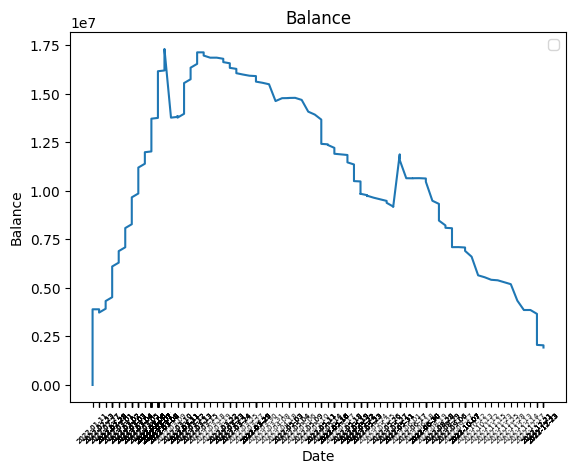

In [173]:
# 잔액 그래프
plt.plot(date_df, balance_df)
plt.xlabel('Date')
plt.ylabel('Balance')

plt.xticks(date_df, fontsize=5)
plt.xticks(date_df, rotation=45)


plt.title('Balance')
plt.legend()
plt.show()

In [174]:
# 학생회비
Total_StudentIncome = df.loc[df['사업'].str.contains('회비', na = False), '수입'].sum()
student_income = df.loc[df['사업'].str.contains('회비', na = False), '수입'].mean()

# Nan 탈출문
if np.isnan(student_income):
   student_income = 0

if np.isnan(Total_StudentIncome):
   Total_StudentIncome = 0

print('%s의 학생회비는 %s원' %(Uni_name,student_income))
print('%s의 총 학생회비 수입은 %s원' %(Uni_name,Total_StudentIncome))

재료화학공학과의 학생회비는 200866.54022988505원
재료화학공학과의 총 학생회비 수입은 17475389원


In [175]:
# 야식사업비
Snack = df.loc[df['사업'].str.contains('야식', na = False), '지출'].sum(skipna = True)

# Nan 탈출문
if np.isnan(Snack):
  Snack = 0

print('%s의 야식사업비는 %s원' %(Uni_name,Snack))

재료화학공학과의 야식사업비는 0원


In [176]:
Month_df = df[['날짜','지출']]
Month_df['날짜'] = pd.to_datetime(Month_df['날짜'])

<ipython-input-176-12590419e728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Month_df['날짜'] = pd.to_datetime(Month_df['날짜'])


In [177]:
# 날짜를 월로 변환하여 새로운 열 생성
Month_df['월'] = pd.to_datetime(Month_df['날짜']).dt.to_period('M')

# 월별 지출 합계 계산
monthly_spending = Month_df.groupby('월').resample('M', on='날짜').sum()
monthly_spending.reset_index(inplace=True)
monthly_spending = monthly_spending.drop('날짜', axis = 1)
print(monthly_spending)

          월       지출
0   2022-01        0
1   2022-02   169000
2   2022-03  5264733
3   2022-04   866900
4   2022-05  5955161
5   2022-06  1129290
6   2022-08  2374850
7   2022-09   997000
8   2022-10  1454200
9   2022-11   456440
10  2022-12  3266660


<ipython-input-177-1f033034b4ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Month_df['월'] = pd.to_datetime(Month_df['날짜']).dt.to_period('M')
<ipython-input-177-1f033034b4ef>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_spending = Month_df.groupby('월').resample('M', on='날짜').sum()
<ipython-input-177-1f033034b4ef>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

In [178]:
mp = monthly_spending
max_expense = mp['지출'].max()
max_month = mp.loc[mp['지출'].idxmax(), '월']

print(f"최대 지출: {max_expense}, 해당 월: {max_month}")

최대 지출: 5955161, 해당 월: 2022-05


In [180]:
Max_expense = df['지출'].max()
Max_purpose = df.loc[df['지출'].idxmax(),'사업']
Max_content = df.loc[df['지출'].idxmax(),'내용']

print(f"최대 지출: {Max_expense}, 해당 사업 : {Max_purpose}, 해당 내용 : {Max_content}")

최대 지출: 3541000, 해당 사업 : 공동구매, 해당 내용 : 과잠 구매 비용 송금
